# 3-Data Preparation and visualize some of the samples

In [30]:
import tensorflow as tf
from tensorflow.keras import Sequential , layers
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from tensorflow.keras.optimizers import Adam

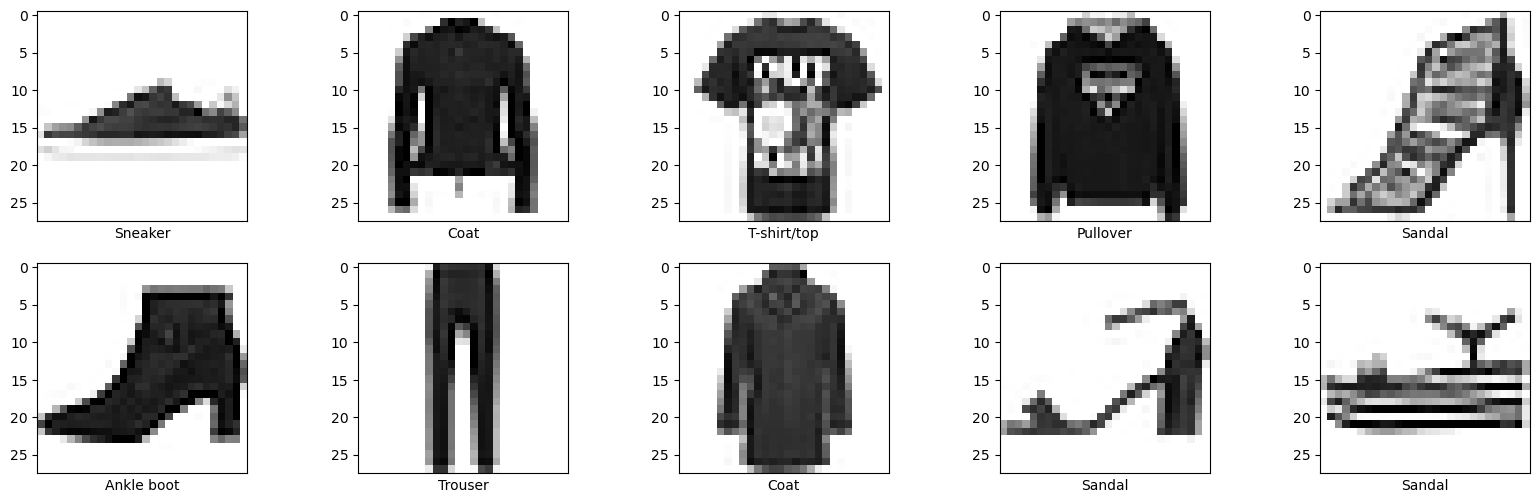

In [20]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(20, 6))
for i in range(10):
    index = np.random.choice(len(X_train),size=1)[0]
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.imshow(X_train[index], cmap='binary')
    plt.xlabel(class_names[y_train[index]])
plt.show()

# 3-Model Implementation

In [23]:
linear_model = Sequential()

linear_model.add(layers.Input(shape=(784,))) 
linear_model.add(layers.Dense(10, activation='softmax'))  

linear_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

# 3-Training and Evaluation

In [32]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

linear_model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = linear_model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1).numpy()

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report)
print("Confusion Matrix:")
print(confusion_matrix)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8648 - loss: 0.3840
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8663 - loss: 0.3831
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8645 - loss: 0.3858
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8671 - loss: 0.3813
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8630 - loss: 0.3884
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8653 - loss: 0.3821
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8659 - loss: 0.3805
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8638 - loss: 0.3857
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8647 - loss: 0.3826
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8677 - loss: 0.3767
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
Test Accuracy: 0.8296
              precision    recall  f1-score   support


# 3-Hyperparameter Tuning

In [16]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64, 128]
epochs = [5, 10, 25, 50]

results = []

for lr in learning_rates:
    for batch_size in batch_sizes:
        for epoch in epochs:
            print(f"Training model with learning rate={lr}, batch size={batch_size}, epochs={epoch}")
            linear_model = Sequential()
            linear_model.add(layers.Input(shape=(784,))) 
            linear_model.add(layers.Dense(10, activation='softmax'))  
            linear_model.compile(optimizer = Adam(learning_rate=lr),
                                 loss='sparse_categorical_crossentropy',metrics=['accuracy'])
            
            linear_model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size ,verbose=0)
            
            y_pred = linear_model.predict(X_test,verbose=0)
            y_pred = tf.argmax(y_pred, axis=1).numpy()
            accuracy = accuracy_score(y_test, y_pred)
            
            results.append({
                'learning_rate': lr,
                'batch_size': batch_size,
                'epochs': epoch,
                'accuracy': accuracy,
            })

            print(f"Accuracy: {accuracy:.4f}\n")

best_result = max(results, key=lambda x: x['accuracy'])
print("\nBest Hyperparameters:")
print(f"Learning Rate: {best_result['learning_rate']}")
print(f"Batch Size: {best_result['batch_size']}")
print(f"Epochs: {best_result['epochs']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")

Training model with learning rate=0.01, batch size=16, epochs=5
Accuracy: 0.7966

Training model with learning rate=0.01, batch size=16, epochs=10
Accuracy: 0.7871

Training model with learning rate=0.01, batch size=16, epochs=25
Accuracy: 0.7972

Training model with learning rate=0.01, batch size=16, epochs=50
Accuracy: 0.7953

Training model with learning rate=0.01, batch size=32, epochs=5
Accuracy: 0.8155

Training model with learning rate=0.01, batch size=32, epochs=10
Accuracy: 0.7942

Training model with learning rate=0.01, batch size=32, epochs=25
Accuracy: 0.8026

Training model with learning rate=0.01, batch size=32, epochs=50
Accuracy: 0.8056

Training model with learning rate=0.01, batch size=64, epochs=5
Accuracy: 0.7998

Training model with learning rate=0.01, batch size=64, epochs=10
Accuracy: 0.8117

Training model with learning rate=0.01, batch size=64, epochs=25
Accuracy: 0.8110

Training model with learning rate=0.01, batch size=64, epochs=50
Accuracy: 0.8087

Trainin

# Problem 4

In [15]:
import numpy as np

my_colors = np.array([
    [255, 0, 0],
    [0, 255, 0],
    [0, 0, 255],
    [255, 255, 0]
])
my_colors = my_colors/255

node_weights = np.array([[[100, 100, 100], [150, 150, 150]],
                            [[50, 50, 50], [200, 200, 200]]]) 
node_weights = node_weights / 255

learning_rate = 0.1
neighborhood_radius = 1
iter_count = 1000

for iteration in range(iter_count):
    for input_color in my_colors:
        
        winner_index = None
        min_distance = float("inf")
        for x in range(2):
            for y in range(2):
                distance = np.linalg.norm(input_color - node_weights[x, y])
                if distance < min_distance:
                    min_distance = distance
                    winner_index = (x, y)
        
        for x in range(2):
            for y in range(2):
                dist_to_winner = np.sqrt((x - winner_index[0]) ** 2 + (y - winner_index[1]) ** 2)
                if dist_to_winner <= neighborhood_radius:
                    
                    influence = np.exp(-dist_to_winner / (2 * (neighborhood_radius ** 2)))
                    node_weights[x, y] += learning_rate * influence * (input_color - node_weights[x, y])

print("Final SOFM weights after training:")
print(np.round((node_weights * 255),2))
print()
for input_color in my_colors:
    winner_index = None
    min_distance = float("inf")
    for x in range(2):
        for y in range(2):
            distance = np.linalg.norm(input_color - node_weights[x, y])
            if distance < min_distance:
                min_distance = distance
                winner_index = (x, y)
    print(input_color*255,"==>",winner_index)

Final SOFM weights after training:
[[[125.2  133.09  50.93]
  [187.38 191.48   0.  ]]

 [[ 63.52  67.62 123.87]
  [131.49 131.49 123.51]]]

[255.   0.   0.] ==> (0, 0)
[  0. 255.   0.] ==> (0, 0)
[  0.   0. 255.] ==> (1, 0)
[255. 255.   0.] ==> (0, 1)


# Problem 5 

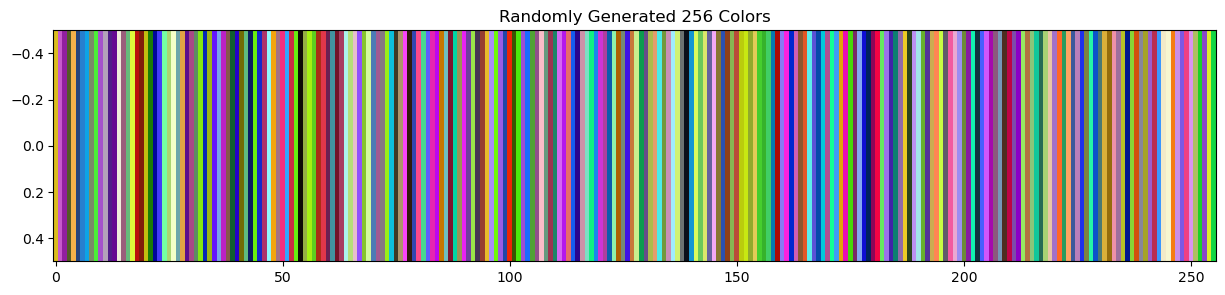

In [46]:
import numpy as np
import matplotlib.pyplot as plt

my_colors = np.random.randint(0,256,(256,3))
plt.figure(figsize=(15, 3))
plt.imshow([my_colors], aspect='auto')
plt.title("Randomly Generated 256 Colors")
plt.show()


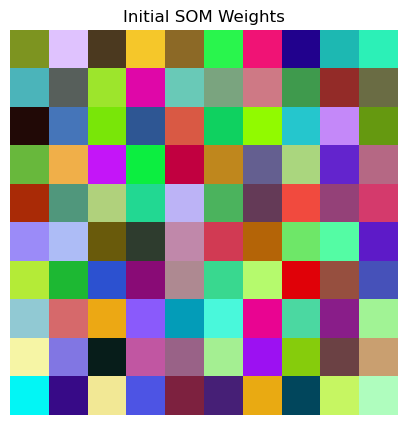

In [48]:
grid_size = (10, 10)
neuron_weights = np.random.rand(10, 10, 3)

plt.figure(figsize=(5, 5))
plt.imshow(neuron_weights, aspect='auto')
plt.axis('off')
plt.title("Initial SOM Weights")
plt.show()


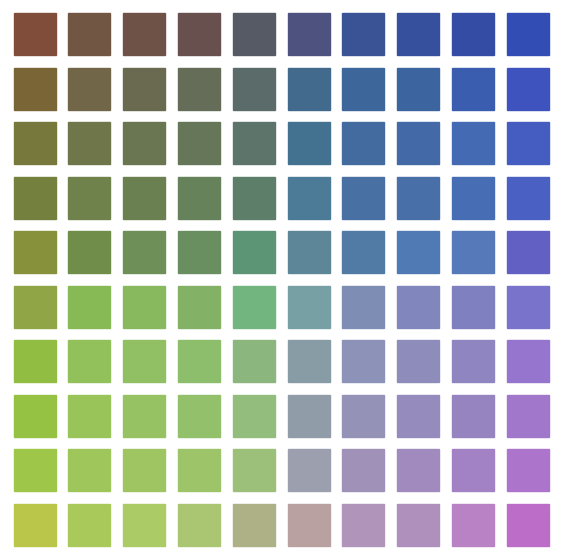

In [50]:
learning_rate = 0.1
epochs = 500
neighborhood_radius = 5

for epoch in range(epochs):
    current_lr = learning_rate * (1 - (epoch / epochs))
    np.random.shuffle(my_colors)
    for color in my_colors:
        distances = np.linalg.norm(neuron_weights - color, axis=2)
        winner_index = np.unravel_index(np.argmin(distances), grid_size)

        for i in range(10):
            for j in range(10):
                neuron_distance = np.sqrt((i - winner_index[0]) ** 2 + (j - winner_index[1]) ** 2)

                if neuron_distance <= neighborhood_radius:
                    influence = np.exp(-neuron_distance ** 2 / (2 * (neighborhood_radius ** 2)))
                    neuron_weights[i, j] += current_lr * influence * (color - neuron_weights[i, j])

neuron_weights = neuron_weights / 255
plt.figure(figsize=(7, 7))
for i in range(10):
    for j in range(10):
        plt.plot(i, j, 's', color=neuron_weights[i, j], markersize=30)
plt.axis('off')
plt.show()
